In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt

from scipy.stats import skew

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

Data exploration after cleaning and merging weather and trips files.

In [3]:
df = pd.read_csv(
    '/Users/rebeccadillon/git/dublin-bus-team-5/machinelearning/data/cleaned/cleaned_merged_weather_trips.csv')


In [4]:
df.shape


(688767, 28)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688767 entries, 0 to 688766
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TRIPID               688767 non-null  int64  
 1   LINEID               688767 non-null  object 
 2   ROUTEID              688767 non-null  object 
 3   DIRECTION            688767 non-null  int64  
 4   PLANNEDTIME_ARR      688767 non-null  float64
 5   PLANNEDTIME_DEP      688767 non-null  float64
 6   HOUR                 688767 non-null  int64  
 7   temp                 688767 non-null  float64
 8   dew_point            688767 non-null  float64
 9   feels_like           688767 non-null  float64
 10  temp_min             688767 non-null  float64
 11  temp_max             688767 non-null  float64
 12  pressure             688767 non-null  int64  
 13  humidity             688767 non-null  int64  
 14  wind_speed           688767 non-null  float64
 15  wind_deg         

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

TRIPID                 0
LINEID                 0
ROUTEID                0
DIRECTION              0
PLANNEDTIME_ARR        0
PLANNEDTIME_DEP        0
HOUR                   0
temp                   0
dew_point              0
feels_like             0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
wind_deg               0
rain_1h                0
snow_1h                0
clouds_all             0
weather_id             0
weather_main           0
weather_description    0
snow_ice               0
heavy_precip           0
TRIPTIME               0
WEEKDAY                0
MONTH                  0
RUSHHOUR               0
dtype: int64

## 1.2 On the training set we will now carry out a series of plots comparing all features to help make decisions on what features to keep for the model 

- All plots will be using the training subset of dataset: X_train, y_train

### 1.2.1 Plot the correlations between all the continuous features. 

In [8]:
#split by direction first
df_dir_1 = df[df['DIRECTION']==1]
df_dir_2 = df[df['DIRECTION']==2]
directions_df_list = [df_dir_1, df_dir_2]

Direction 1
The skew of this distribution is =  0.3024169525710524


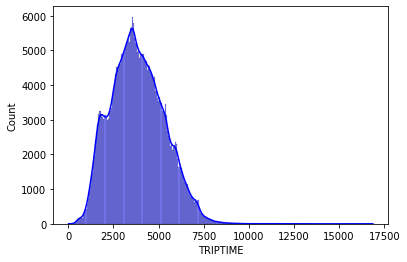

Direction 2
The skew of this distribution is =  0.2510738900584646


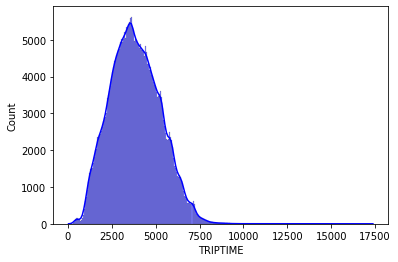

In [9]:
i=0
for direction in directions_df_list:
    i+=1
    print("Direction", str(i))
    # Analyse the histogram
    print('The skew of this distribution is = ', skew(direction['TRIPTIME']))
    sns.histplot(direction['TRIPTIME'], kde = True, color = 'blue')
    plt.show()


The skew value above indicates that the data is positively skewed or skewed right. I will now check for outliers, first by creating a boxplot of the data.

### change
I will check for outliers by LINEID instead of by DIRECTION

#### Direction 1

In [10]:
dir_1_lines = list(df_dir_1['LINEID'].unique())

Line 68


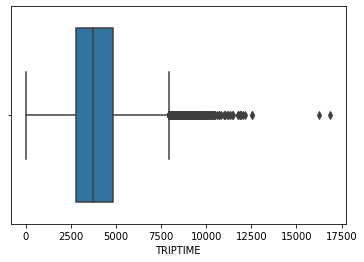

Line 59


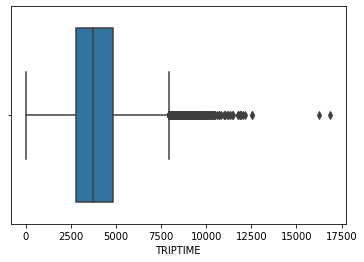

Line 26


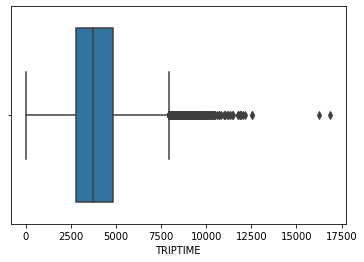

Line 1


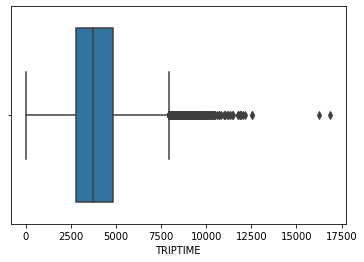

Line 84


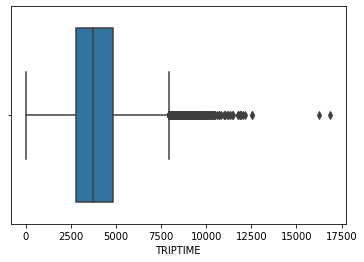

Line 11


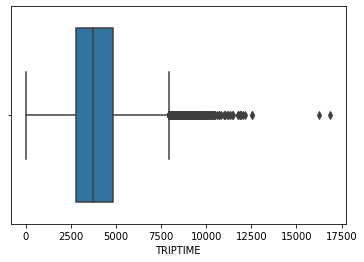

Line 75


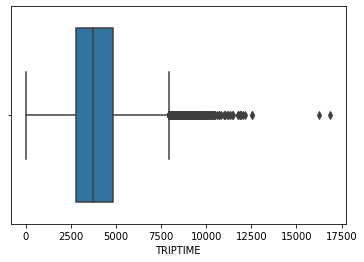

Line 42


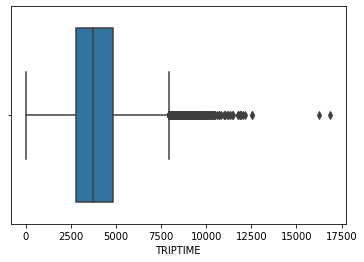

Line 123


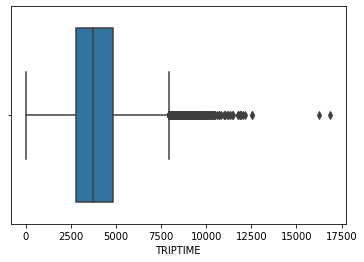

Line 25


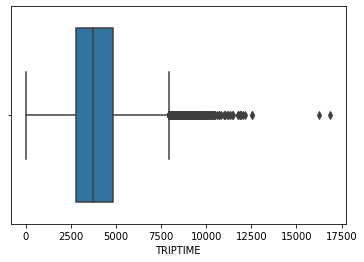

Line 65B


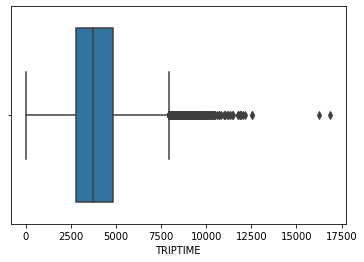

Line 83


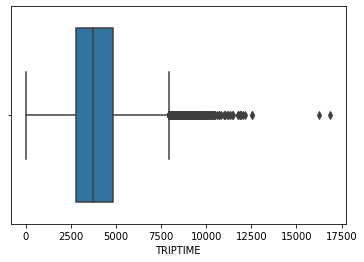

Line 31


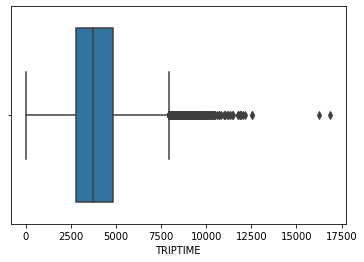

Line 54A


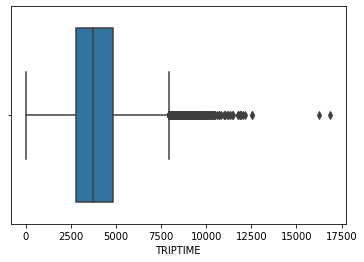

Line 66B


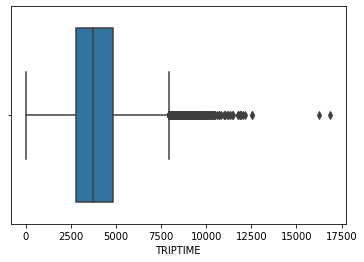

Line 15


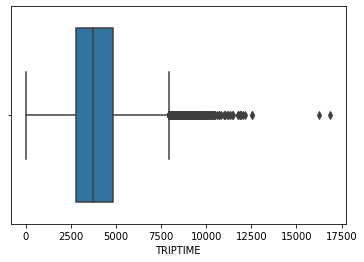

Line 15B


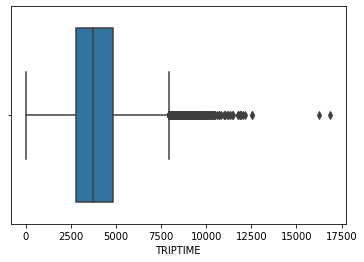

Line 66


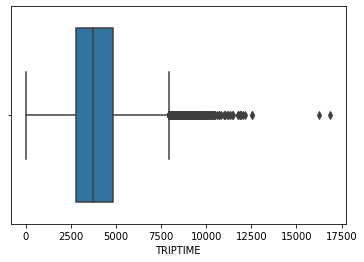

Line 27


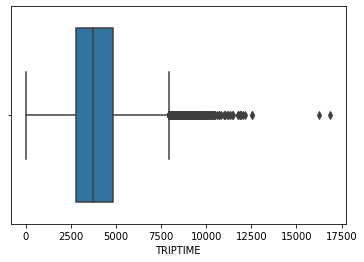

Line 17A


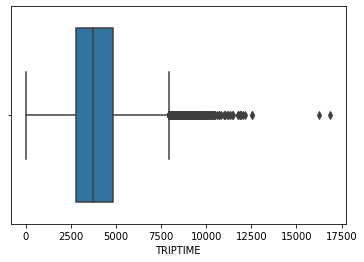

Line 41B


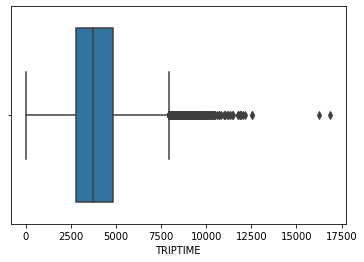

Line 184


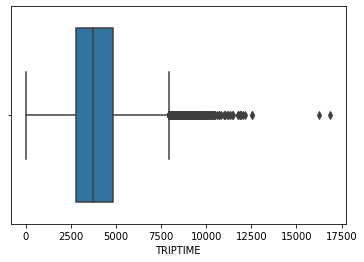

Line 9


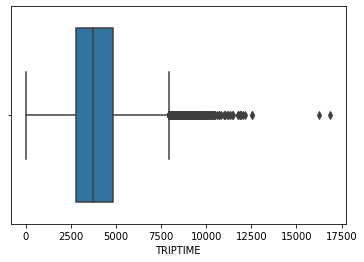

Line 65


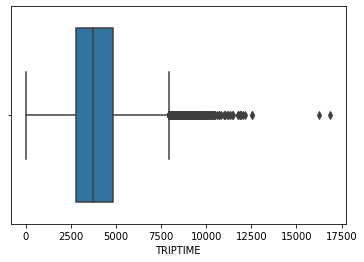

Line 39A


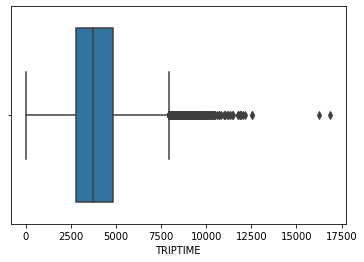

Line 56A


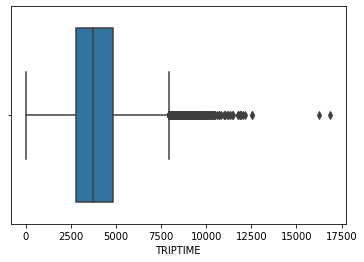

Line 151


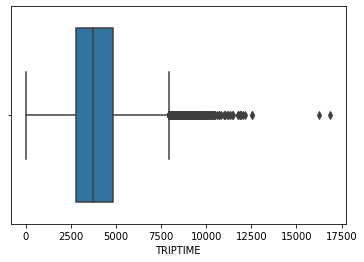

Line 270


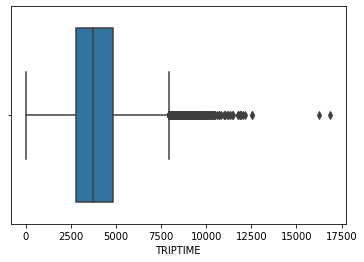

Line 122


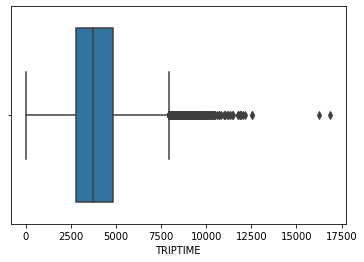

Line 33


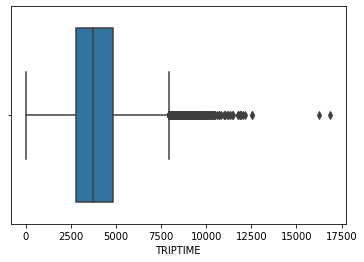

Line 79


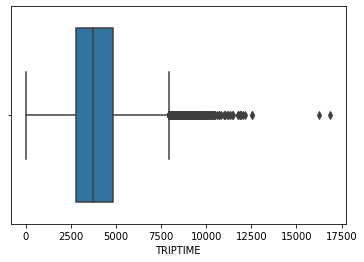

Line 27A


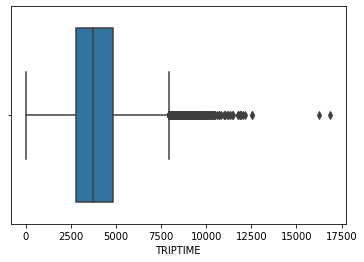

Line 46A


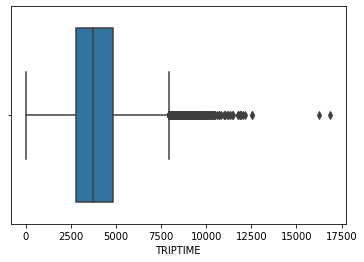

Line 33B


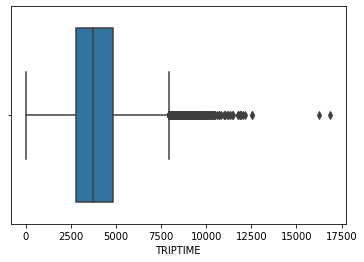

Line 45A


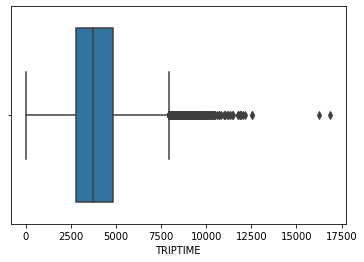

Line 25A


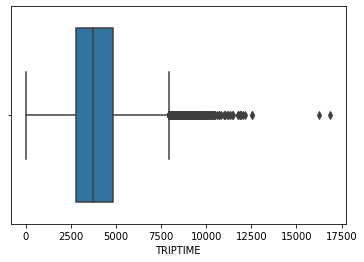

Line 40


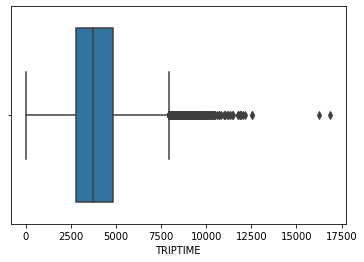

Line 44


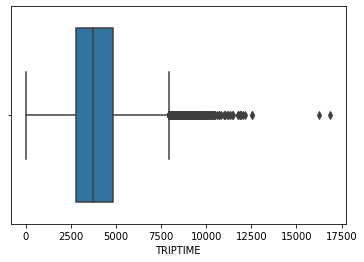

Line 32


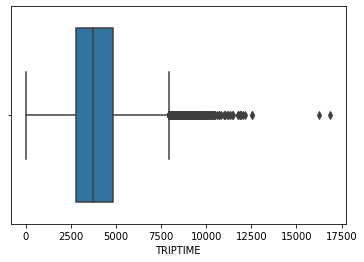

Line 150


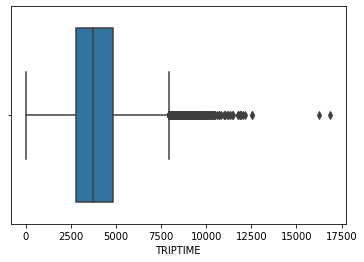

Line 185


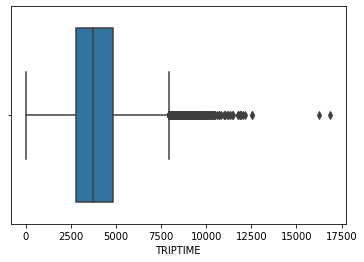

Line 130


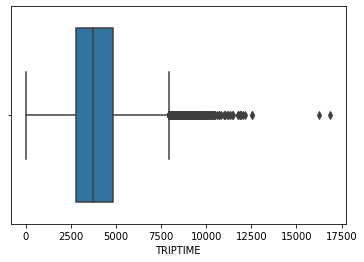

Line 47


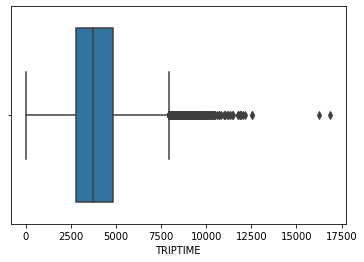

Line 40D


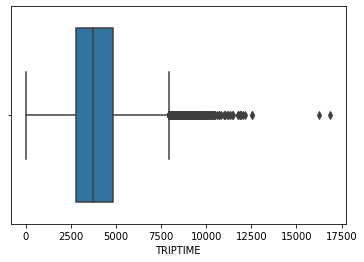

Line 69


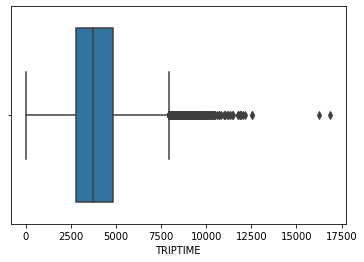

Line 67


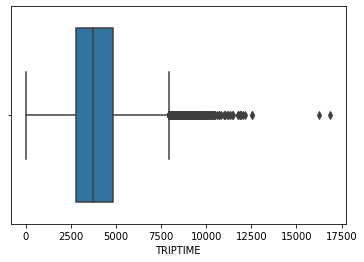

Line 70


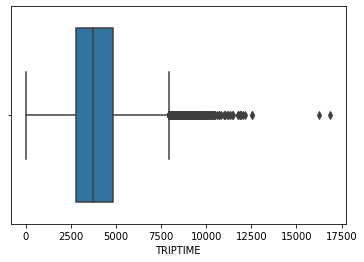

Line 16C


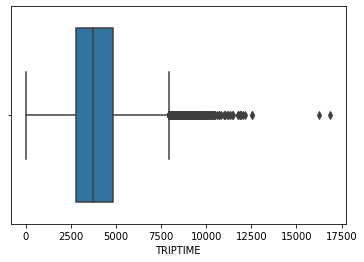

Line 37


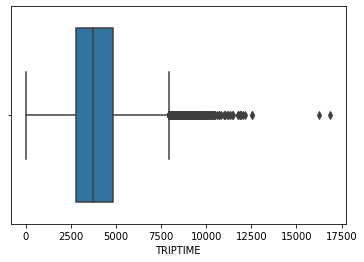

Line 41C


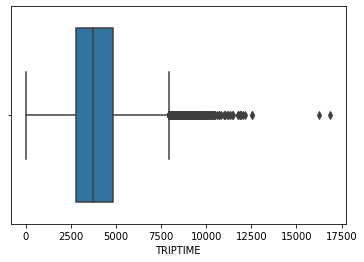

Line 40B


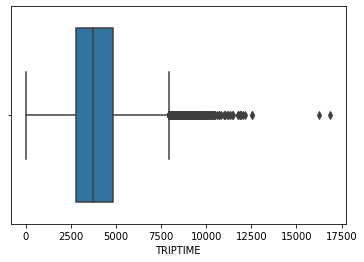

Line 4


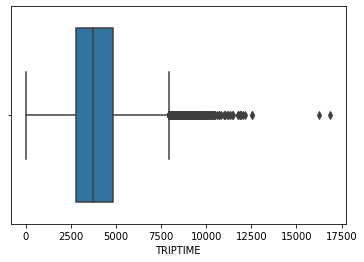

Line 120


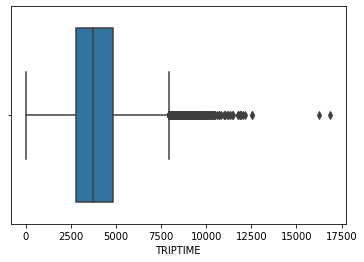

Line 66A


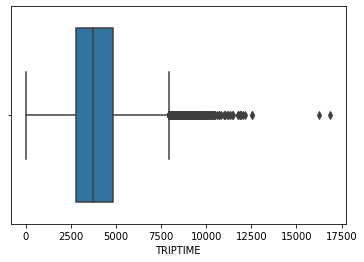

Line 14


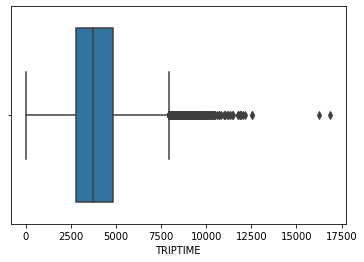

Line 15A


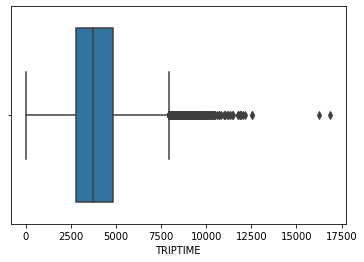

Line 111


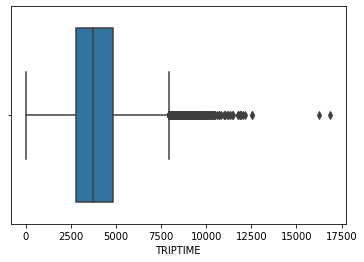

Line 145


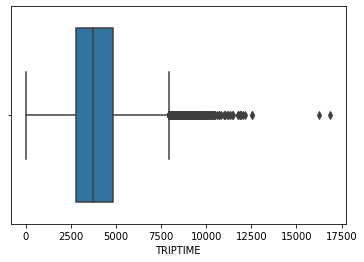

Line 53


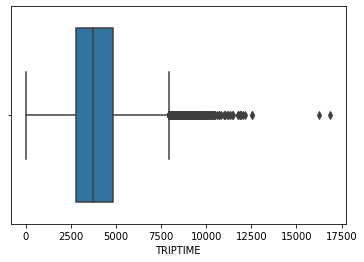

Line 41


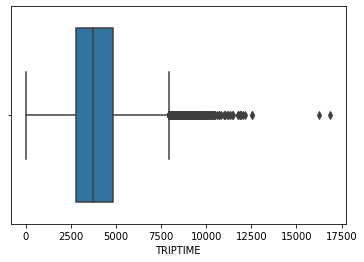

Line 239


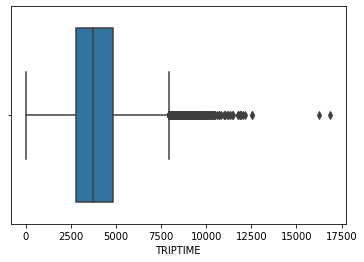

Line 102


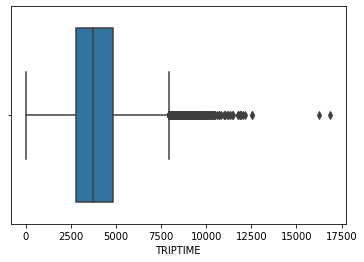

Line 68A


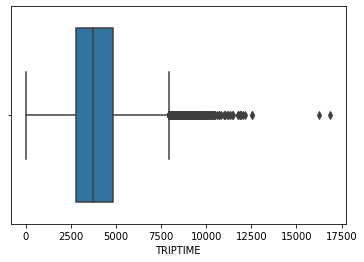

Line 31A


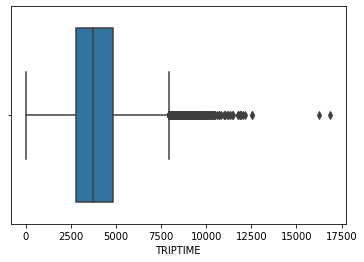

Line 114


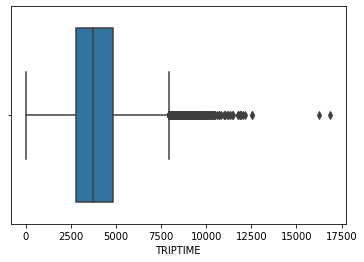

Line 16


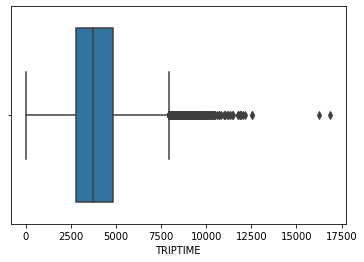

Line 140


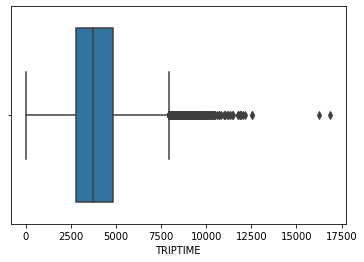

Line 7


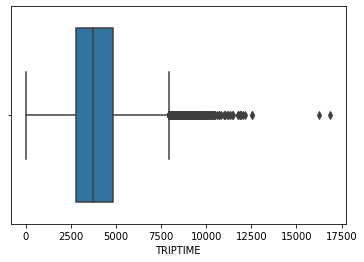

Line 84A


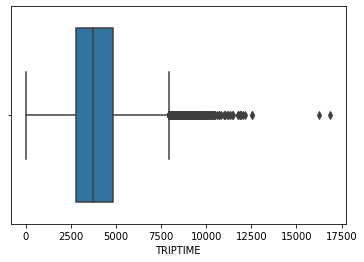

Line 13


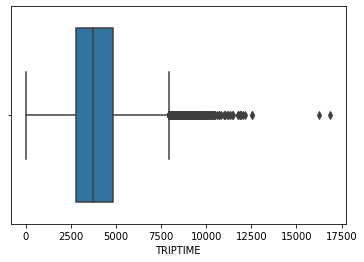

Line 77A


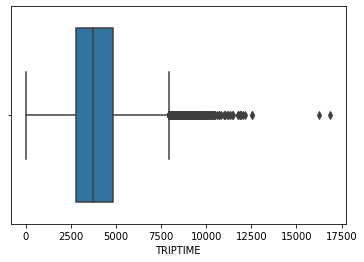

Line 220


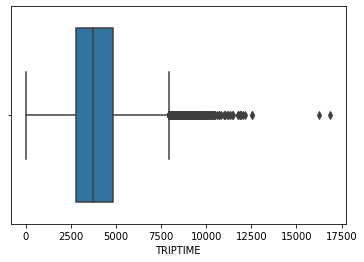

Line 63


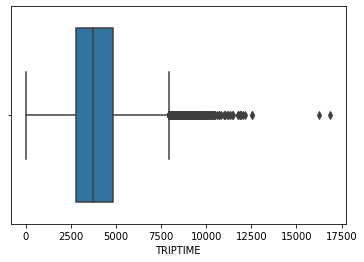

Line 236


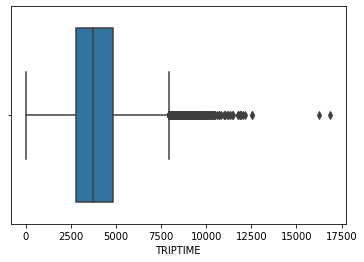

Line 38


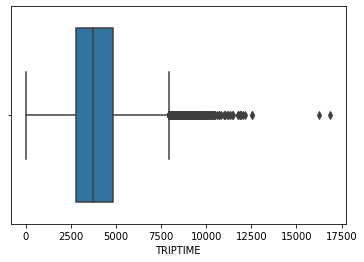

Line 27B


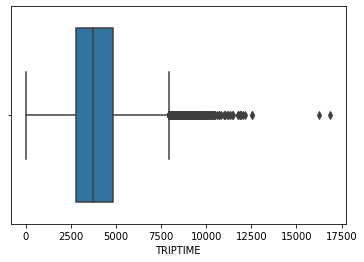

Line 39


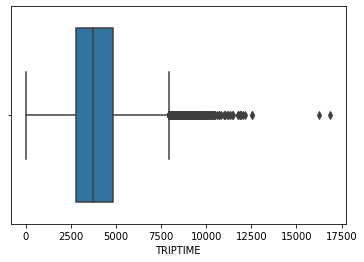

Line 43


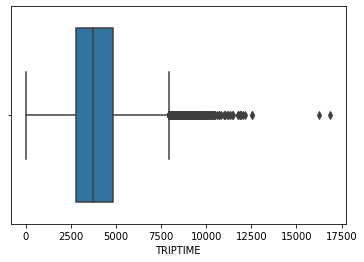

Line 17


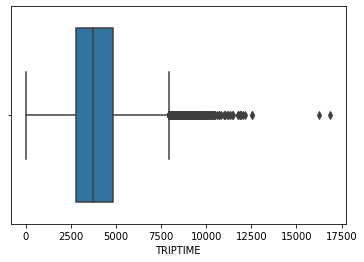

Line 49


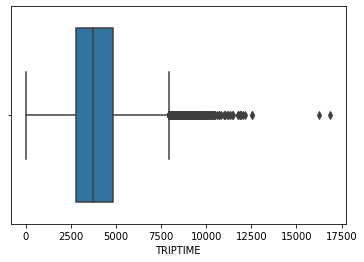

Line 79A


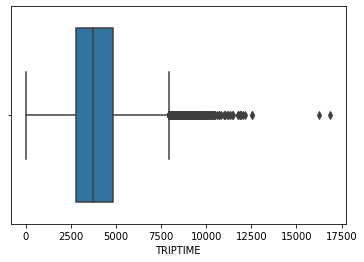

Line 38A


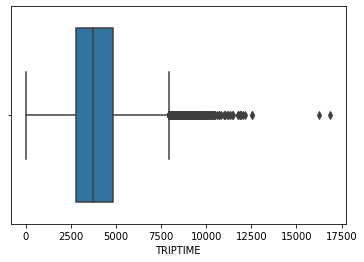

Line 44B


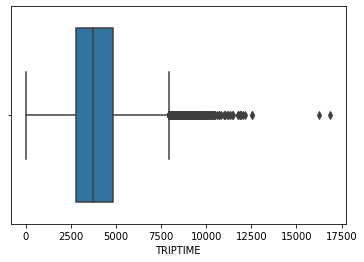

Line 29A


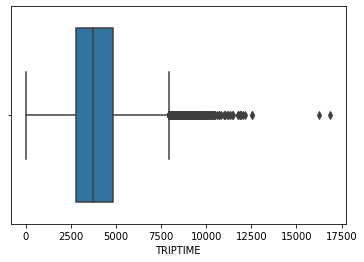

Line 76


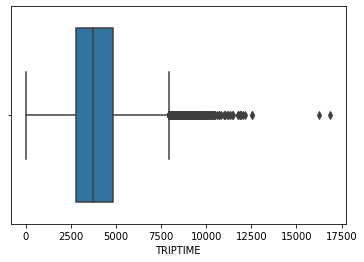

Line 25B


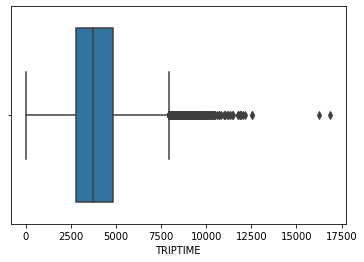

Line 7A


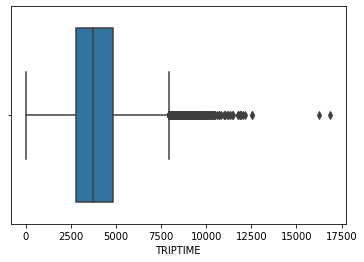

Line 116


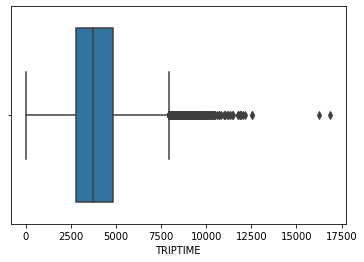

Line 61


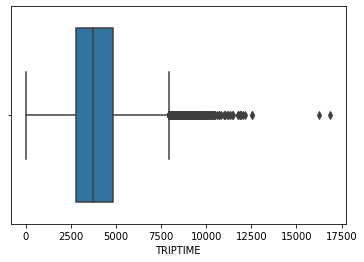

Line 238


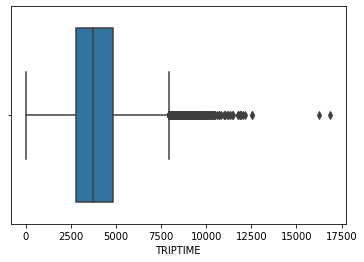

Line 18


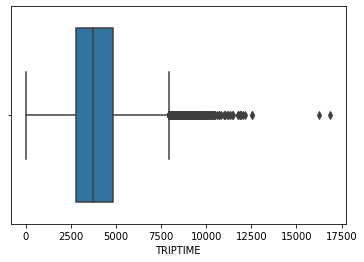

Line 33A


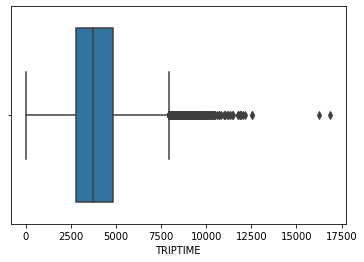

Line 104


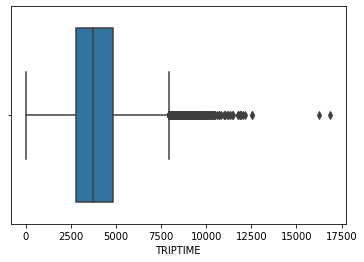

Line 142


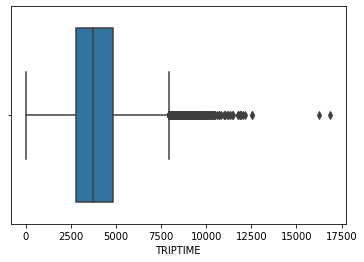

Line 83A


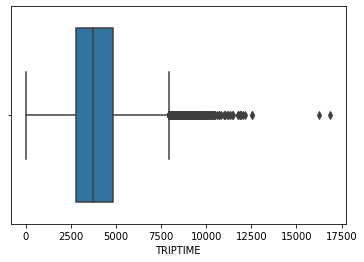

Line 33X


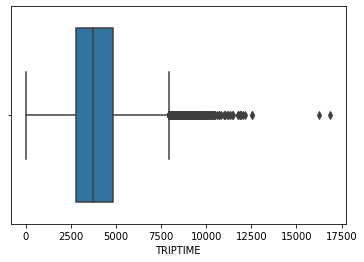

Line 67X


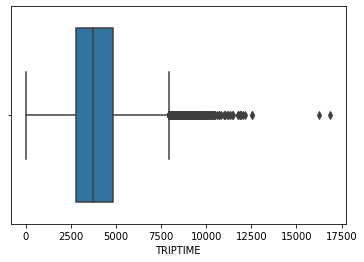

Line 15D


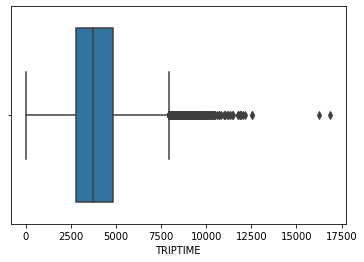

Line 39X


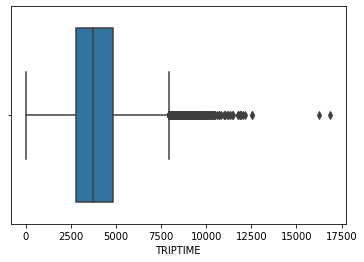

Line 84X


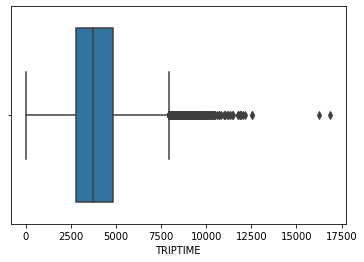

Line 66X


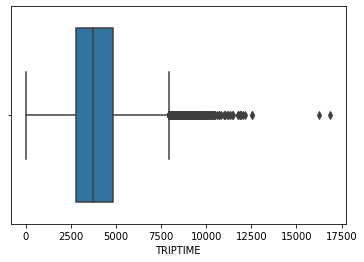

Line 41X


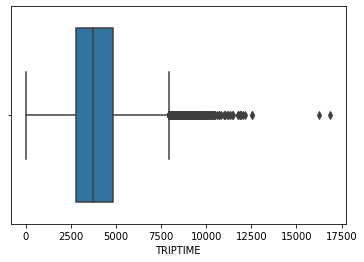

Line 25X


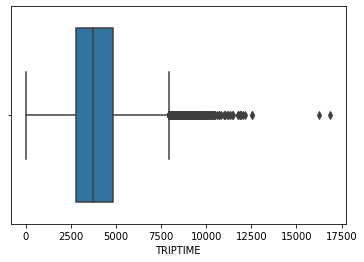

Line 31B


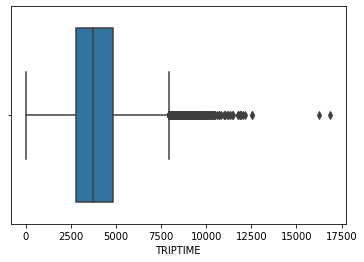

Line 38B


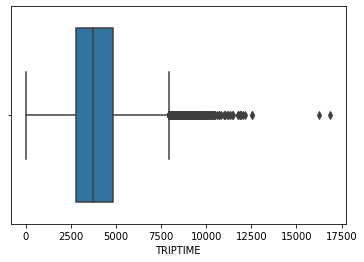

Line 27X


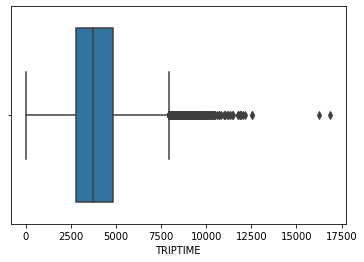

Line 31D


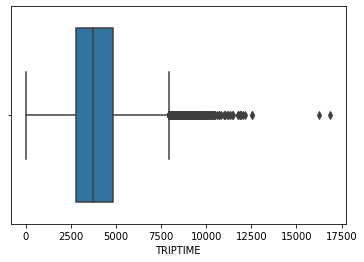

Line 7B


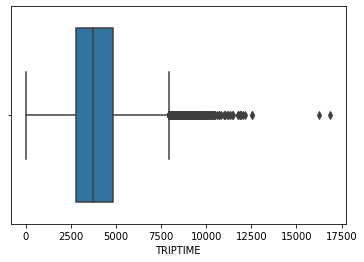

Line 51D


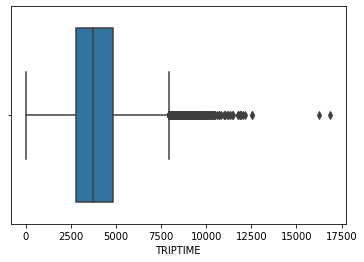

Line 42D


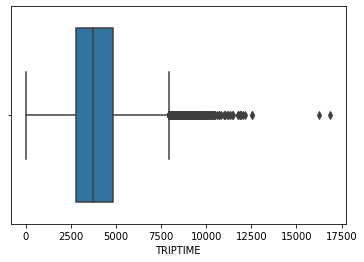

Line 70D


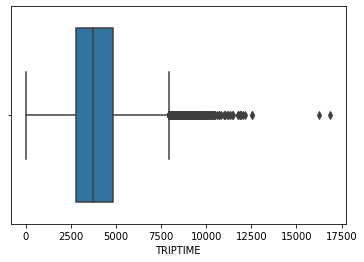

Line 7D


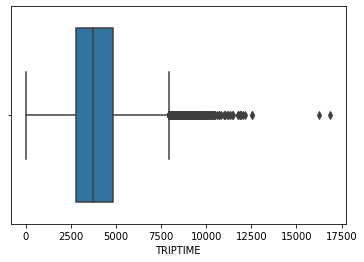

Line 25D


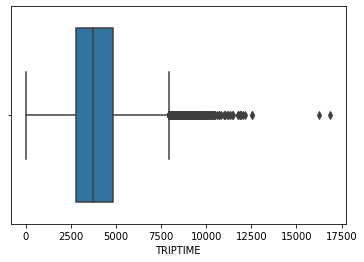

Line 33D


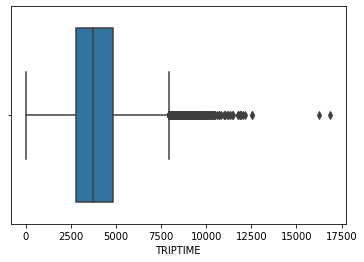

Line 69X


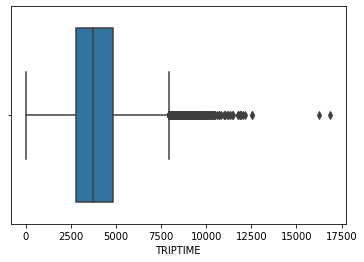

Line 32X


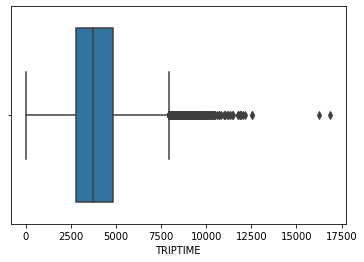

Line 38D


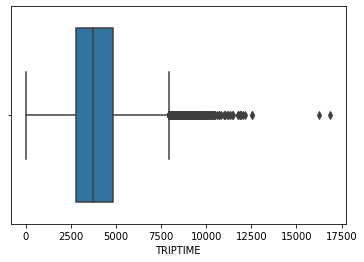

Line 14C


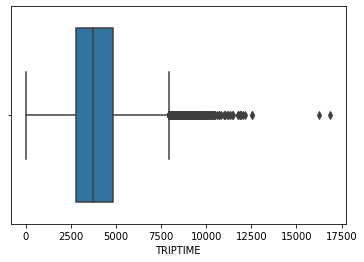

Line 76A


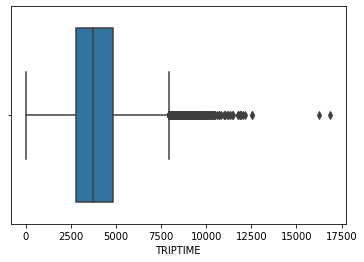

Line 40E


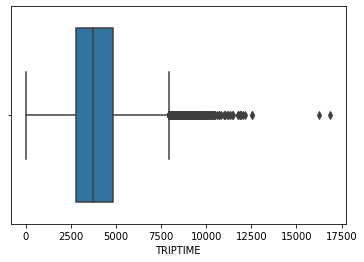

Line 161


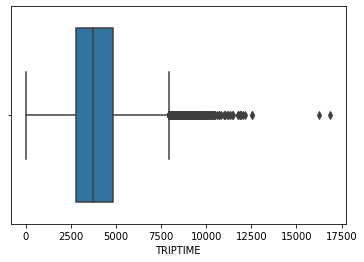

Line 16D


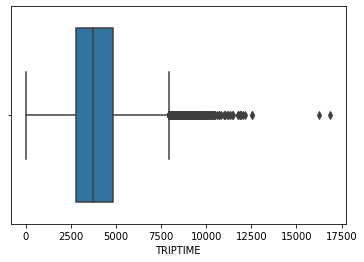

Line 33E


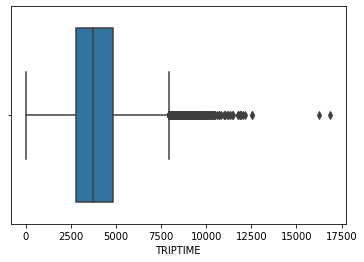

Line 41D


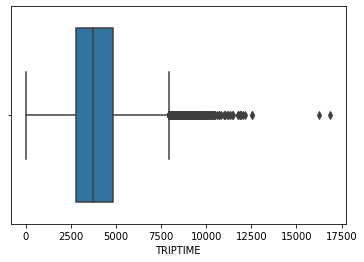

In [11]:
for line in dir_1_lines:
    # Analyse the histogram
    print("Line", str(line))
    sns.boxplot(x=df_dir_1['TRIPTIME'])
    plt.show()

We can see from the above boxplot that there are some outliers lying between 15000 and 17500 seconds.

Code from https://stackoverflow.com/questions/68959573/how-do-i-delete-rows-in-a-dataframe-based-on-numpy-where

In [12]:
for line in dir_1_lines:
    # print number of rows in dataframe
    print("Number of rows remaining in dataframe:", str(df_dir_1.shape[0]))

    df_dir_1.reset_index(drop=True, inplace=True)
    print("Now doing line", str(line))

    # select all rows with the current line id 
    df_selected_line = df_dir_1.loc[df_dir_1['LINEID']==line]
    
    # get zscores
    line_zscores = np.abs(stats.zscore(df_selected_line['TRIPTIME']))
    
    # get rows above and below threshold
    rows_above_threshold = np.where(line_zscores > 3)
    rows_below_threshold = np.where(line_zscores < -3)
    # print number of rows
    print("There are", str(len(rows_above_threshold[0])), "row(s) above the threshold, and", str(len(rows_below_threshold[0])), "row(s) below \
         the threshold. ", str(len(rows_above_threshold[0])+len(rows_below_threshold[0])), "row(s) will be dropped from the dataframe")
    
    # convert to numpy array
    rows_above_threshold = np.asarray(rows_above_threshold)
    rows_below_threshold = np.asarray(rows_below_threshold)

    # drop rows outside of threshold
    df_dir_1 = df_dir_1.drop(rows_above_threshold.flatten(), axis=0)
    df_dir_1 = df_dir_1.drop(rows_below_threshold.flatten(), axis=0)

Number of rows remaining in dataframe: 345290
Now doing line 68
There are 9 row(s) above the threshold, and 0 row(s) below          the threshold.  9 row(s) will be dropped from the dataframe
Number of rows remaining in dataframe: 345281
Now doing line 59
There are 5 row(s) above the threshold, and 0 row(s) below          the threshold.  5 row(s) will be dropped from the dataframe
Number of rows remaining in dataframe: 345276
Now doing line 26
There are 33 row(s) above the threshold, and 0 row(s) below          the threshold.  33 row(s) will be dropped from the dataframe
Number of rows remaining in dataframe: 345243
Now doing line 1
There are 4 row(s) above the threshold, and 0 row(s) below          the threshold.  4 row(s) will be dropped from the dataframe
Number of rows remaining in dataframe: 345239
Now doing line 84
There are 29 row(s) above the threshold, and 0 row(s) below          the threshold.  29 row(s) will be dropped from the dataframe
Number of rows remaining in dataframe

I will now reindex the rows

In [13]:
df_dir_1.reset_index(drop=True, inplace=True)

Save to csv

In [14]:
df_dir_1.to_csv('/Users/rebeccadillon/git/dublin-bus-team-5/machinelearning/data/cleaned/data_exploration_dir_1_cleaned.csv', index=False)

### Direction 2 

In [ ]:
dir_2_lines = list(df_dir_2['LINEID'].unique())

Line 65


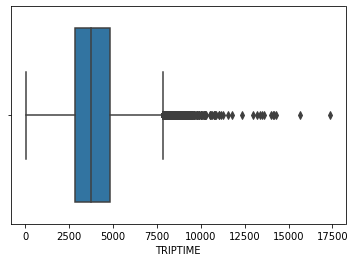

Line 40


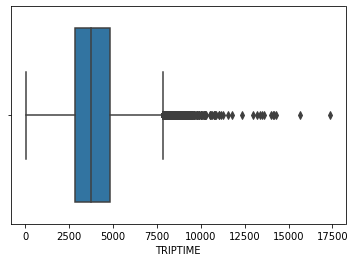

Line 15B


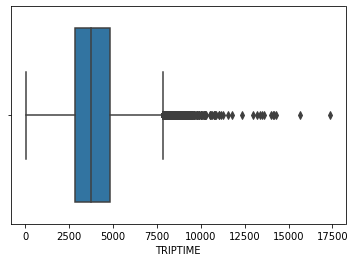

Line 7B


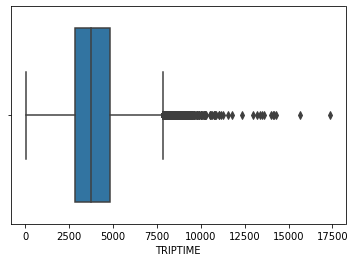

Line 150


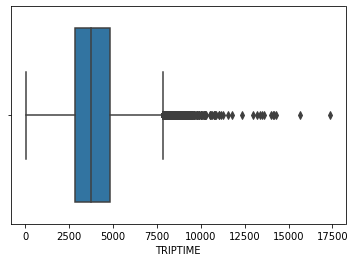

Line 33


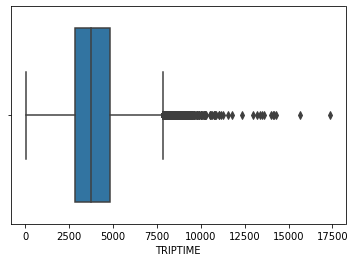

Line 56A


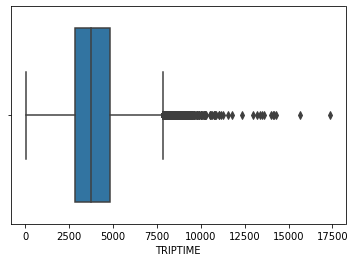

Line 33X


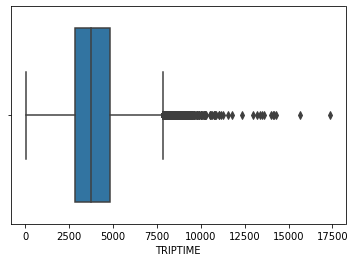

Line 29A


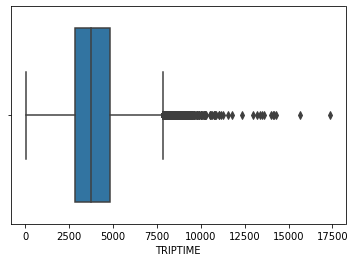

Line 18


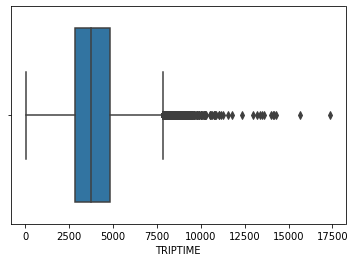

Line 49


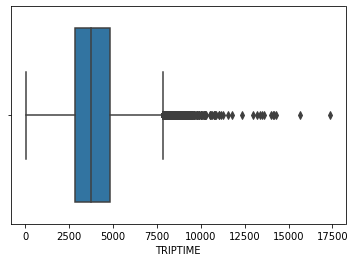

Line 83


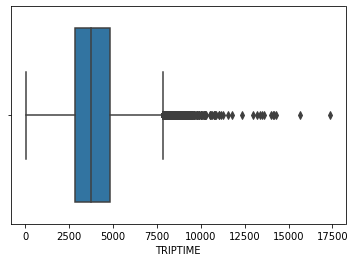

Line 70


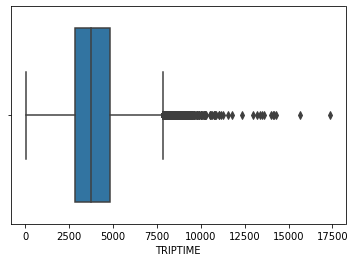

Line 184


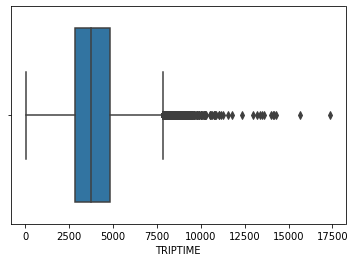

Line 4


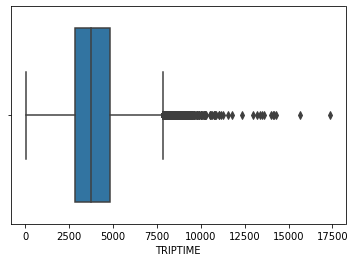

Line 15


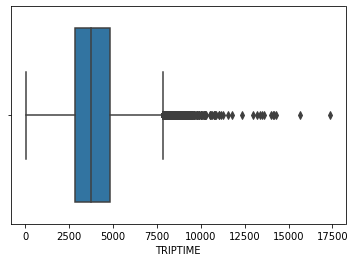

Line 41


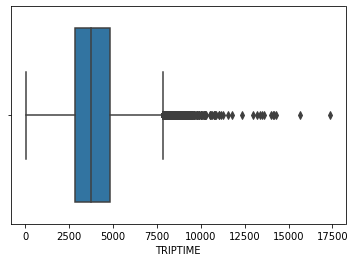

Line 46A


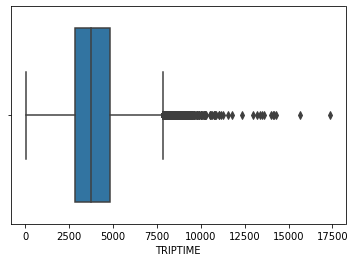

Line 76A


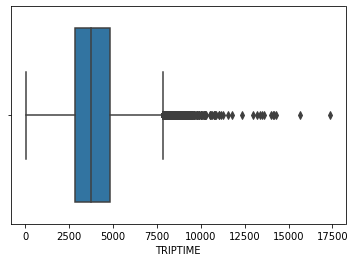

Line 44


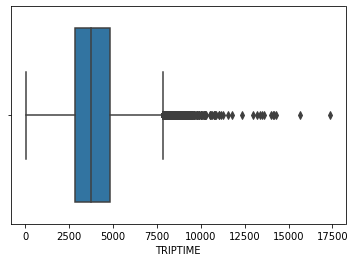

Line 11


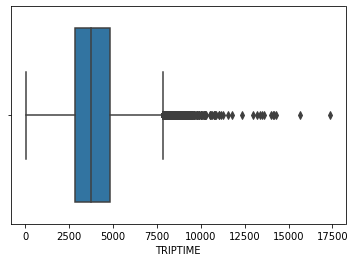

Line 77A


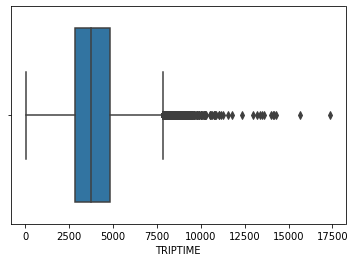

Line 43


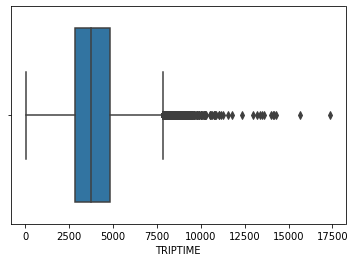

Line 27


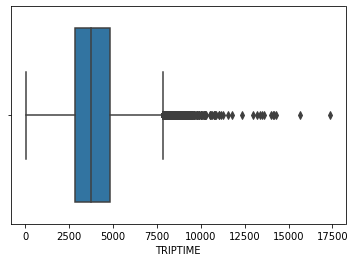

Line 75


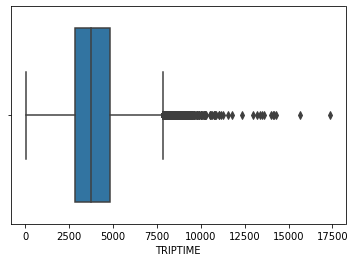

Line 37


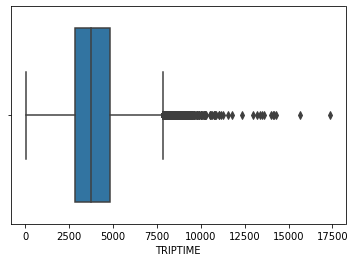

Line 47


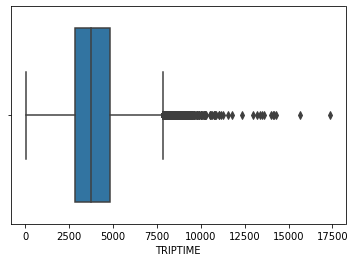

Line 270


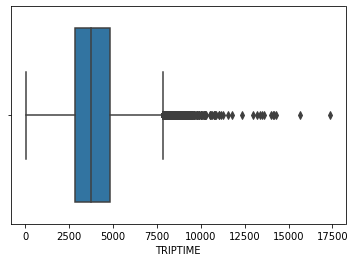

Line 38B


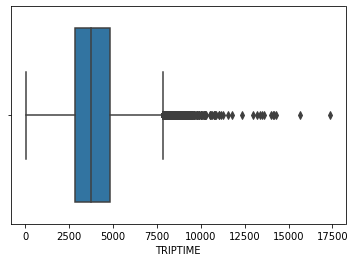

Line 14


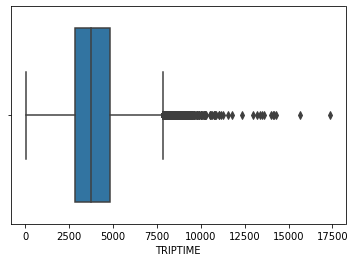

Line 53


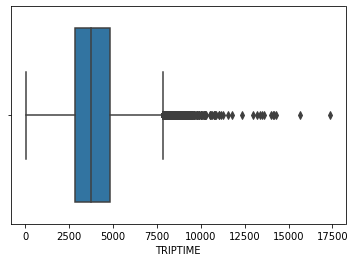

Line 130


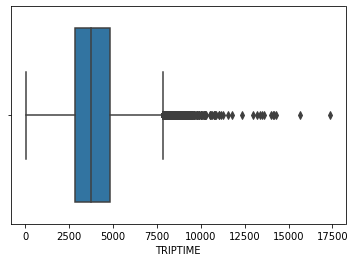

Line 140


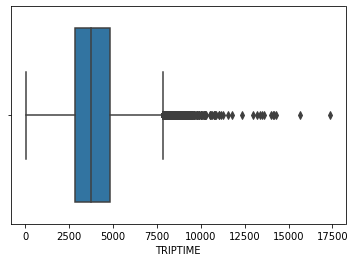

Line 27X


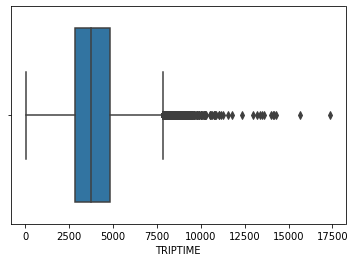

Line 41X


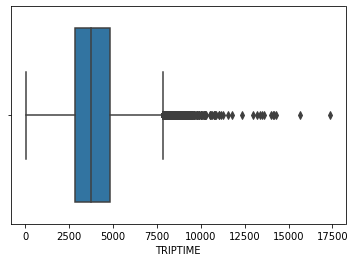

Line 70D


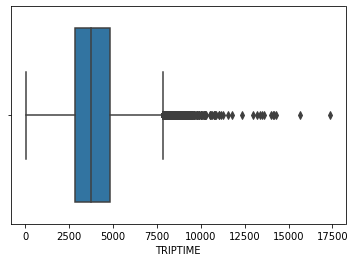

Line 145


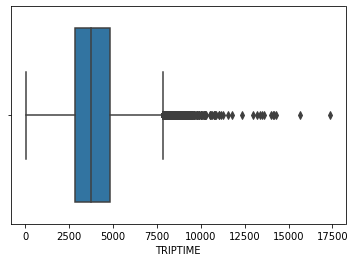

Line 32


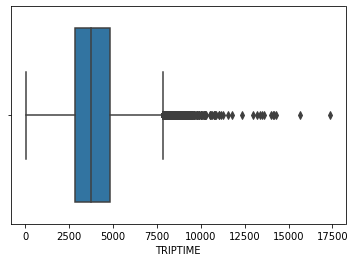

Line 39A


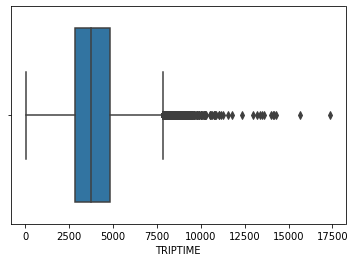

Line 41B


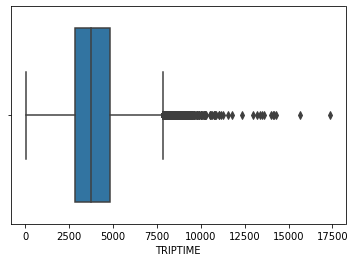

Line 239


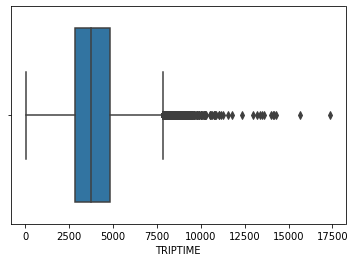

Line 69X


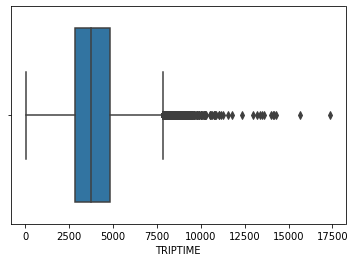

Line 84


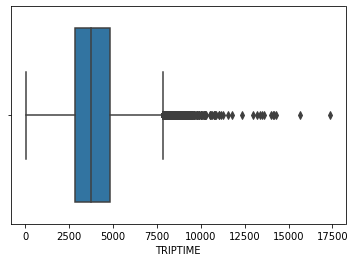

Line 41C


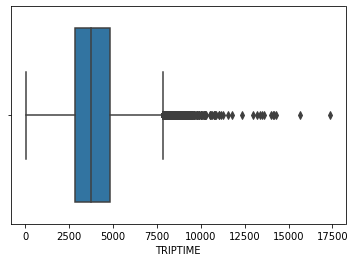

Line 7A


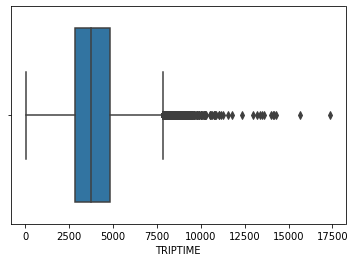

Line 66X


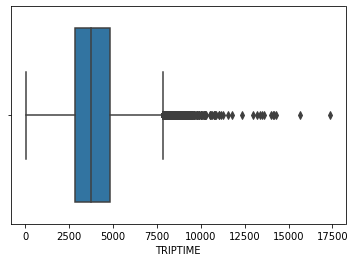

Line 13


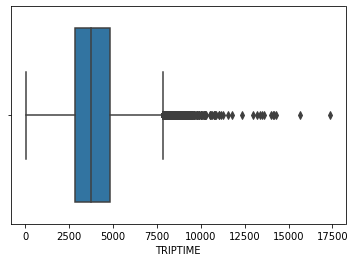

Line 27A


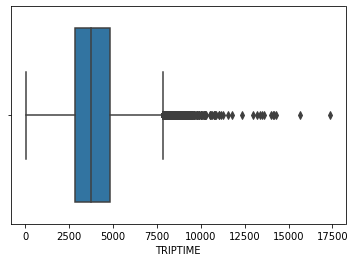

Line 65B


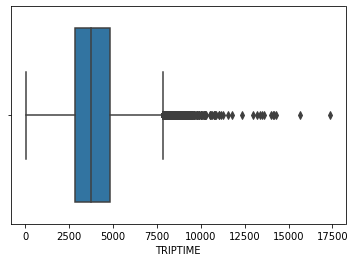

Line 1


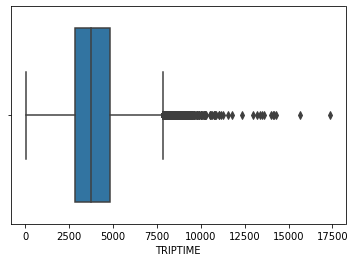

Line 38


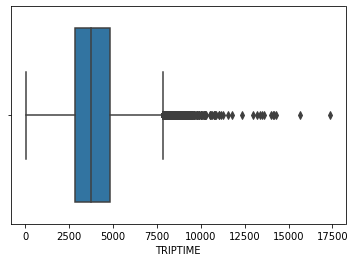

Line 25B


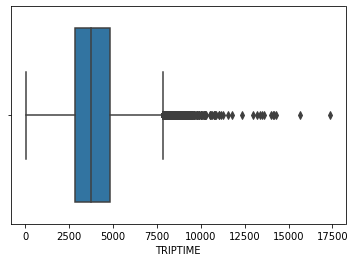

Line 7


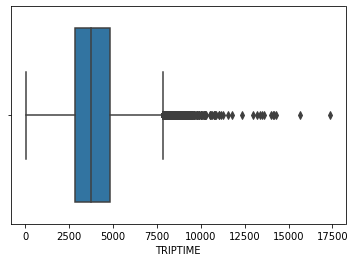

Line 122


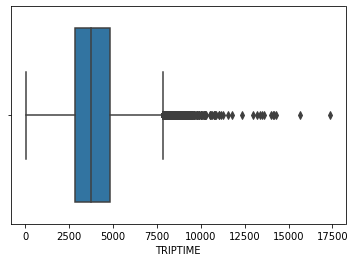

Line 42


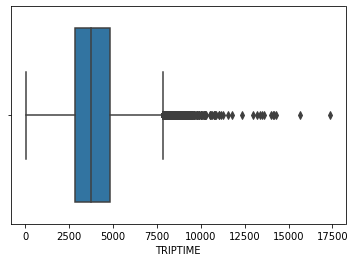

Line 123


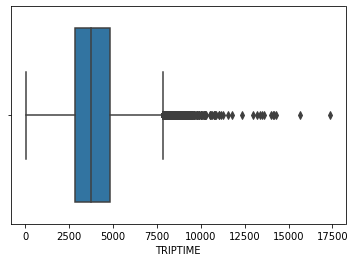

Line 84X


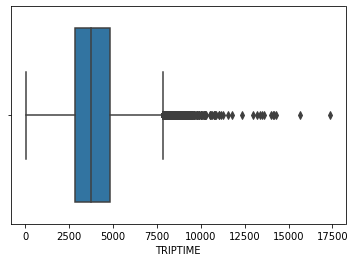

Line 51X


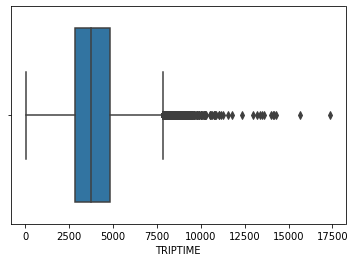

Line 67X


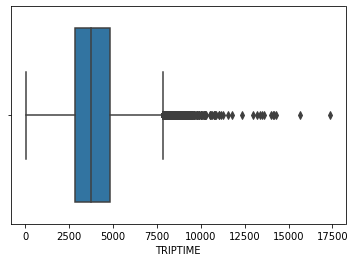

Line 9


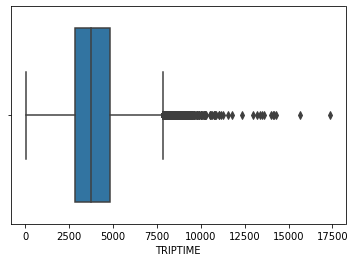

Line 68


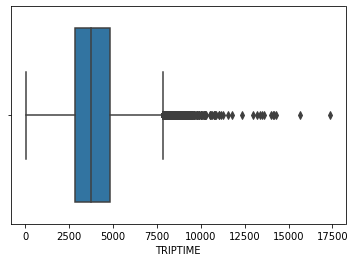

Line 40D


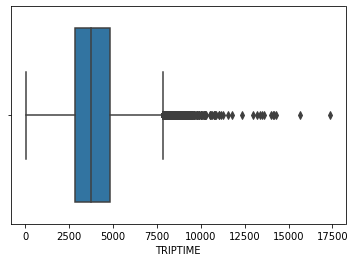

Line 46E


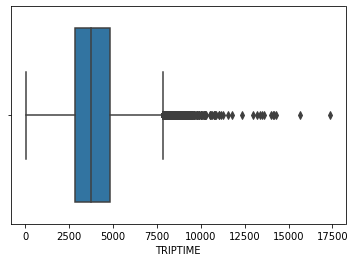

Line 26


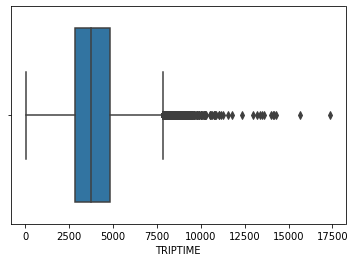

Line 59


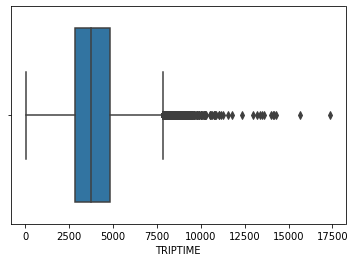

Line 15D


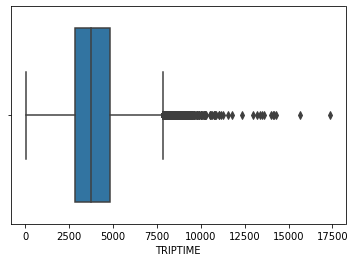

Line 16


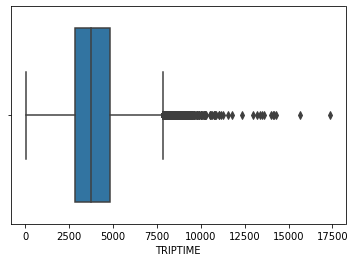

Line 33B


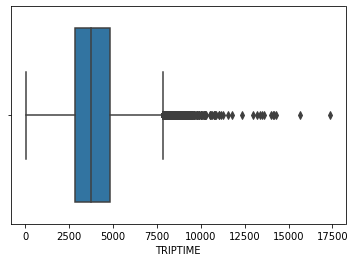

Line 15A


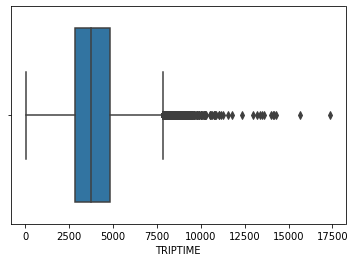

Line 76


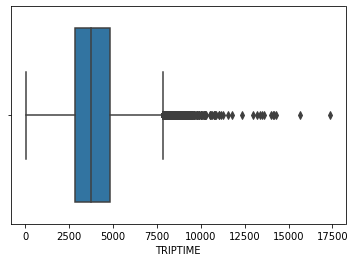

Line 17


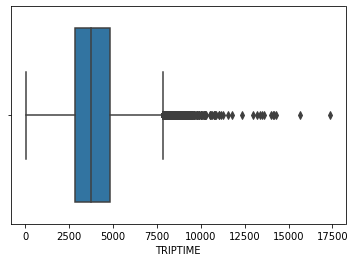

Line 220


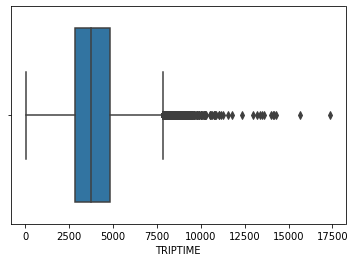

Line 45A


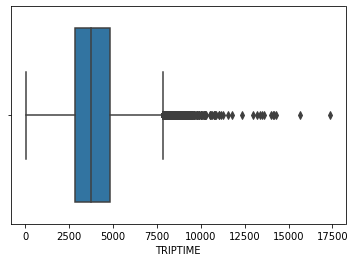

Line 25X


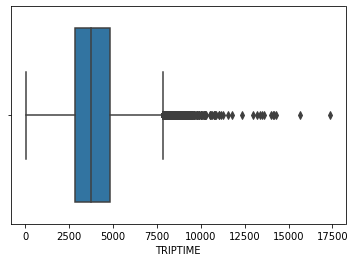

Line 17A


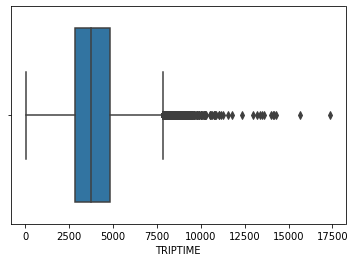

Line 25A


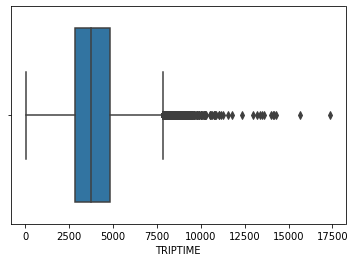

Line 66


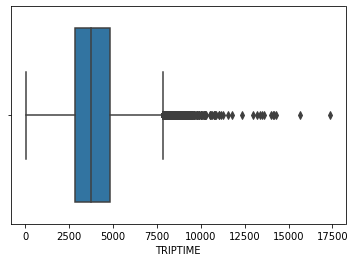

Line 83A


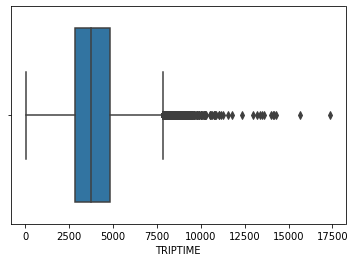

Line 38A


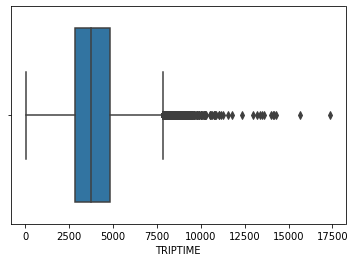

Line 67


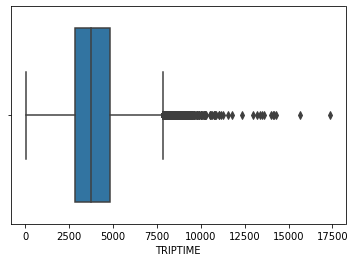

Line 31


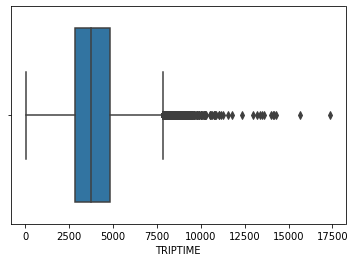

Line 102


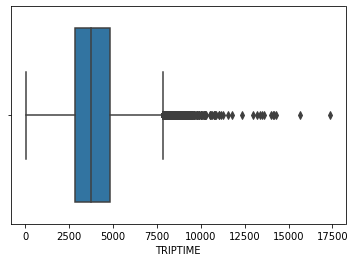

Line 185


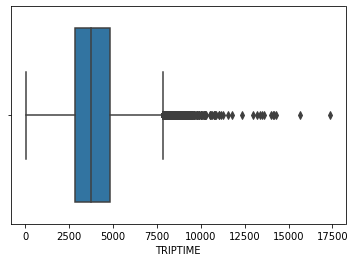

Line 39


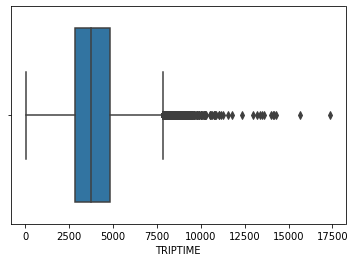

Line 84A


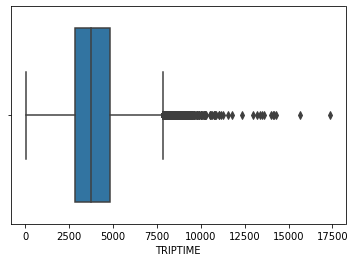

Line 238


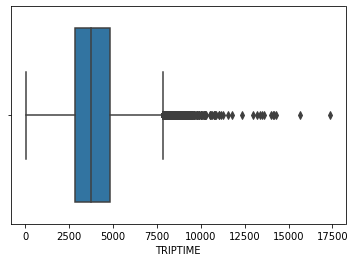

Line 111


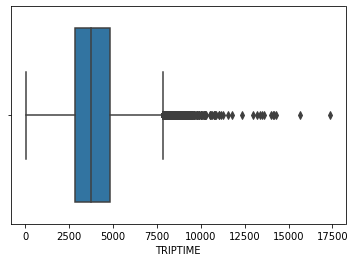

Line 63


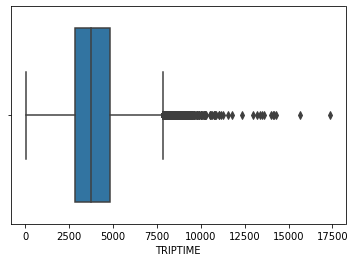

Line 104


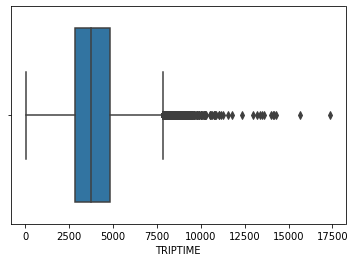

Line 114


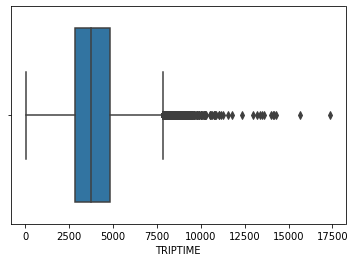

Line 33A


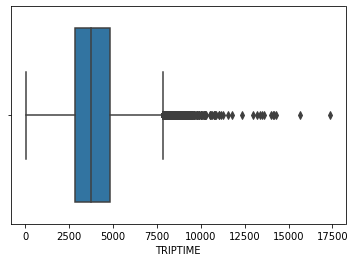

Line 120


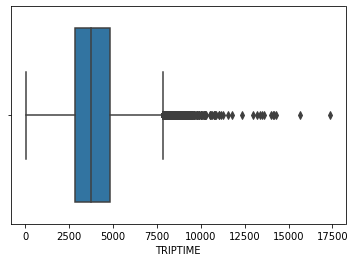

Line 142


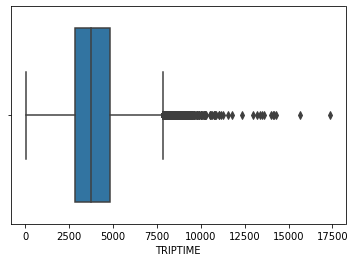

Line 27B


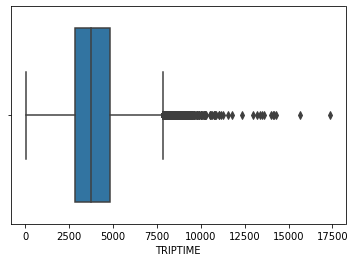

Line 69


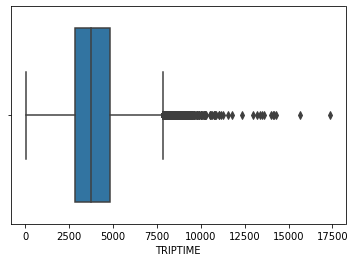

Line 79


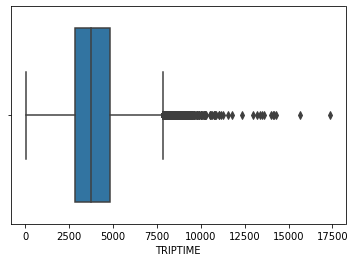

Line 25


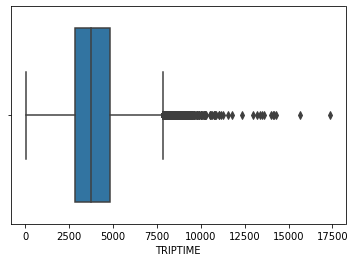

Line 66A


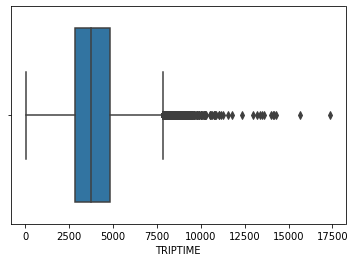

Line 151


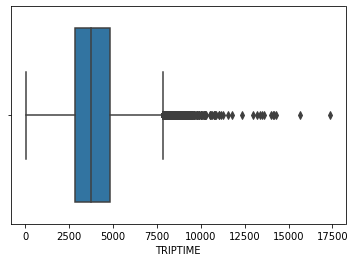

Line 54A


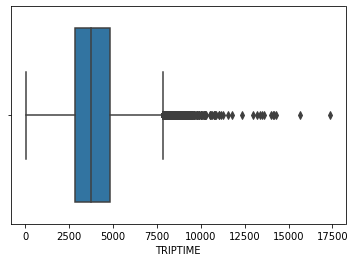

Line 31A


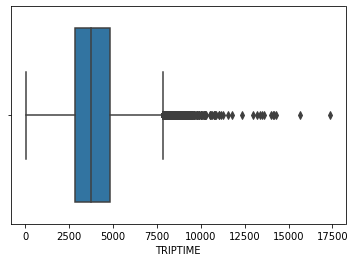

Line 79A


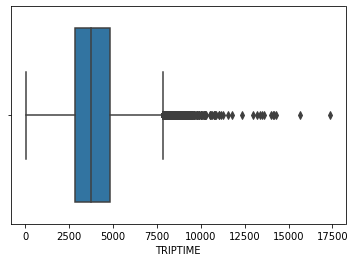

Line 61


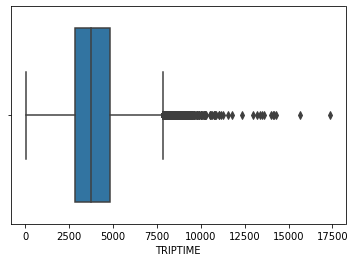

Line 31B


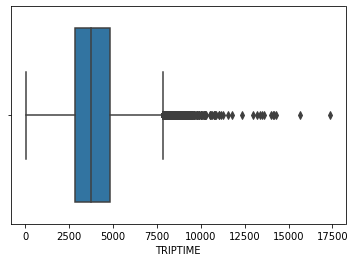

Line 66B


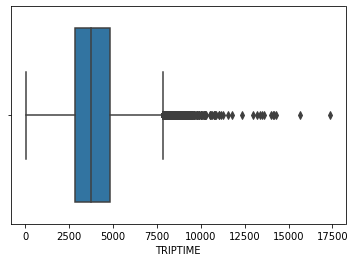

Line 7D


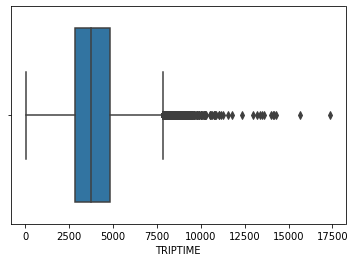

Line 41A


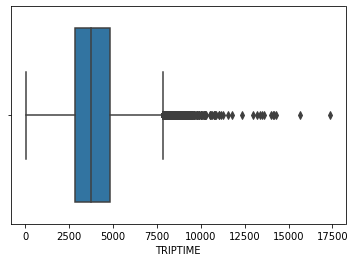

Line 51D


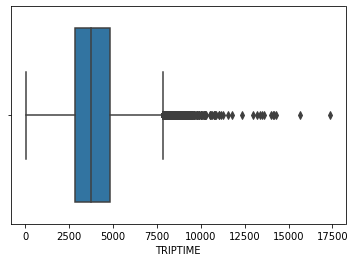

Line 118


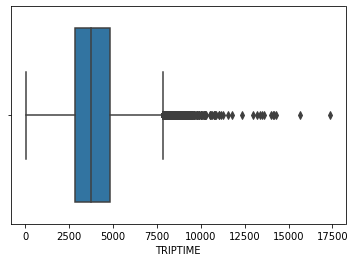

Line 39X


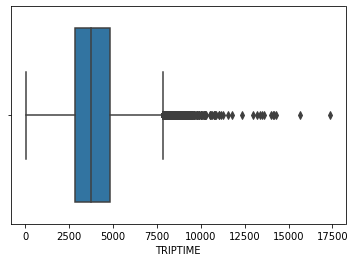

Line 116


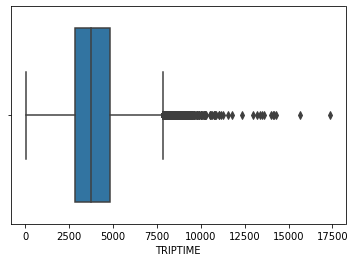

Line 42D


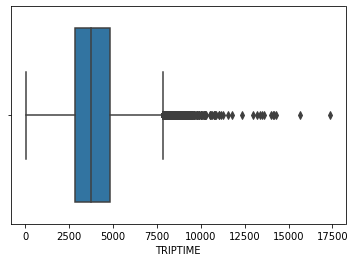

Line 68A


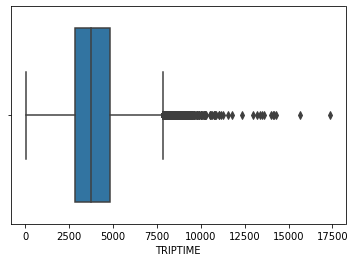

Line 77X


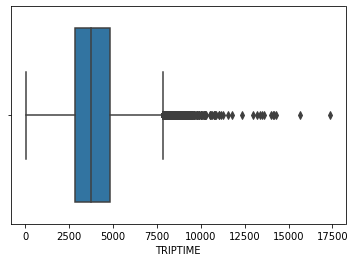

Line 44B


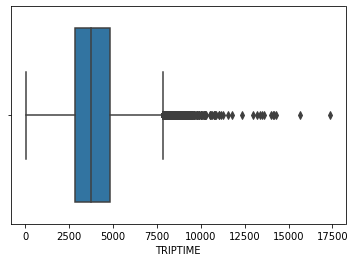

Line 40B


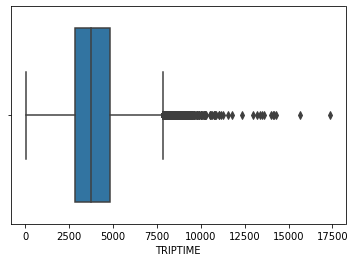

Line 16C


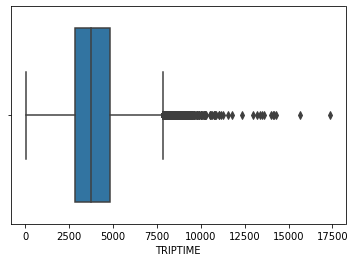

Line 31D


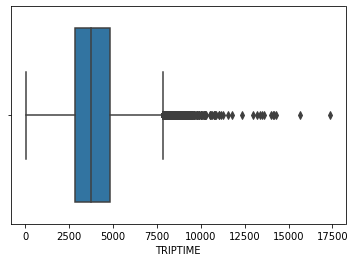

Line 25D


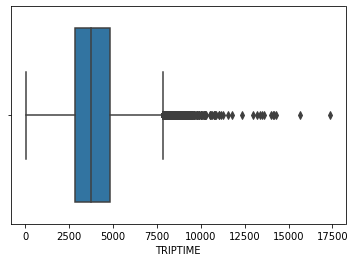

Line 161


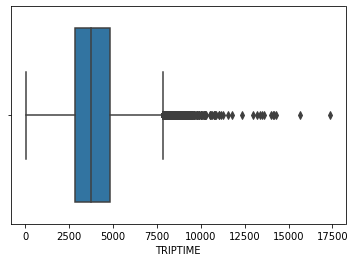

Line 236


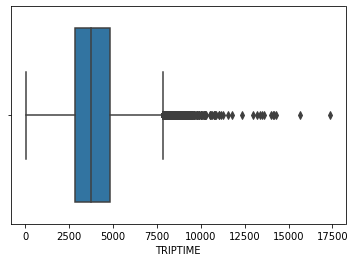

Line 14C


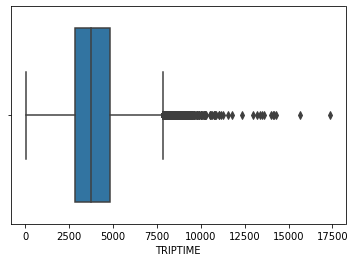

Line 32X


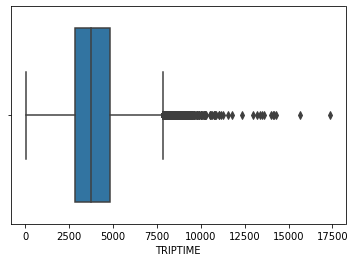

Line 68X


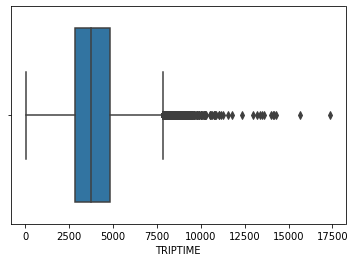

Line 38D


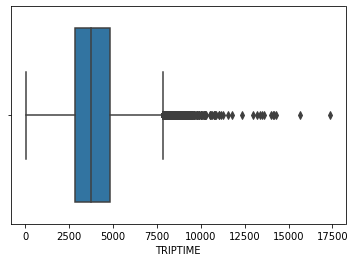

Line 33D


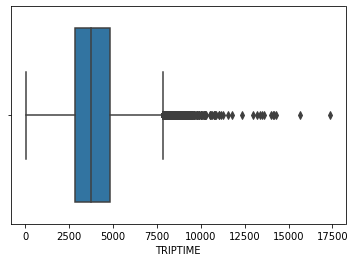

Line 40E


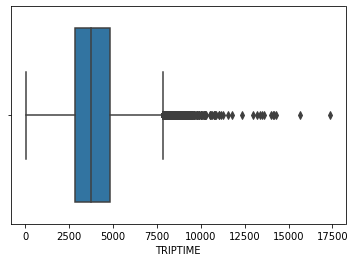

Line 41D


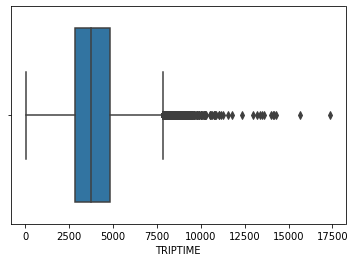

In [ ]:
for line in dir_2_lines:
    # Analyse the histogram
    print("Line", str(line))
    sns.boxplot(x=df_dir_2['TRIPTIME'])
    plt.show()

In [ ]:
for line in dir_2_lines:
    # print number of rows in dataframe
    print("Number of rows remaining in dataframe:", str(df_dir_2.shape[0]))

    df_dir_2.reset_index(drop=True, inplace=True)
    print("Now doing line", str(line))

    # select all rows with the current line id 
    df_selected_line = df_dir_2.loc[df_dir_2['LINEID']==line]
    
    # get zscores
    line_zscores = np.abs(stats.zscore(df_selected_line['TRIPTIME']))
    
    # get rows above and below threshold
    rows_above_threshold = np.where(line_zscores > 3)
    rows_below_threshold = np.where(line_zscores < -3)
    # print number of rows
    print("There are", str(len(rows_above_threshold[0])), "row(s) above the threshold, and", str(len(rows_below_threshold[0])), "row(s) below \
         the threshold. ", str(len(rows_above_threshold[0])+len(rows_below_threshold[0])), "row(s) will be dropped from the dataframe")
    
    # convert to numpy array
    rows_above_threshold = np.asarray(rows_above_threshold)
    rows_below_threshold = np.asarray(rows_below_threshold)

    # drop rows outside of threshold
    df_dir_2 = df_dir_2.drop(rows_above_threshold.flatten(), axis=0)
    df_dir_2 = df_dir_2.drop(rows_below_threshold.flatten(), axis=0)

Number of rows remaining in dataframe: 356083
Now doing line 65
There are 5 row(s) above the threshold, and 0 row(s) below          the threshold.  5 row(s) will be dropped from the dataframe
Number of rows remaining in dataframe: 356078
Now doing line 40
There are 220 row(s) above the threshold, and 0 row(s) below          the threshold.  220 row(s) will be dropped from the dataframe
Number of rows remaining in dataframe: 355858
Now doing line 15B
There are 77 row(s) above the threshold, and 0 row(s) below          the threshold.  77 row(s) will be dropped from the dataframe
Number of rows remaining in dataframe: 355781
Now doing line 7B
There are 0 row(s) above the threshold, and 0 row(s) below          the threshold.  0 row(s) will be dropped from the dataframe
Number of rows remaining in dataframe: 355781
Now doing line 150
There are 52 row(s) above the threshold, and 0 row(s) below          the threshold.  52 row(s) will be dropped from the dataframe
Number of rows remaining in da

In [12]:
df_dir_2.to_csv('/Users/rebeccadillon/git/dublin-bus-team-5/machinelearning/data/cleaned/data_exploration_dir_2_cleaned.csv', index=False)

Move to feature_pairwise_interactions.ipynb